# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [63]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter("ignore")

sns.set_style("whitegrid")

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

In [47]:
print(X)
print(X.shape)

model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  1. 10. ... 10.  9.  0.]
 [ 0.  0. 15. ...  6.  2.  0.]
 [ 0.  0.  6. ...  6.  0.  0.]]
(537, 64)
[0.98165138 1.         0.99065421 0.99056604 0.98113208]
0.9888007389923625


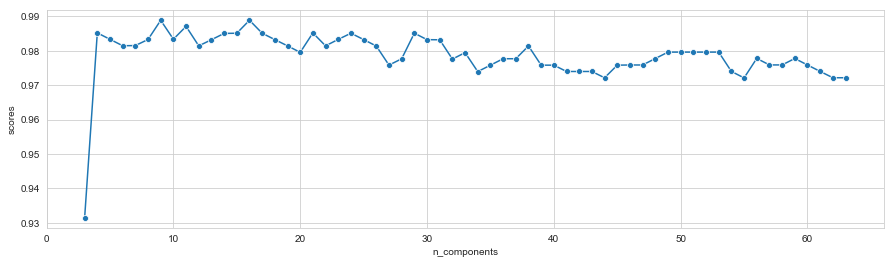

In [66]:
scaler = StandardScaler()
l = list()    
for i in range(3,64):
    pca = PCA(n_components=i)
    pca.fit(X)
    newX = pca.transform(X)

    newX_ss = scaler.fit_transform(newX)
    model = LogisticRegression()
    scores = cross_val_score(model, newX_ss, y, cv=5,scoring='accuracy')
#     print("n_components={}, score={}".format(i, scores.mean()))
    l.append(scores.mean())

df = pd.DataFrame({"n_components": np.arange(3,64), "scores":l})
 
plt.figure(figsize=(15, 4))      
sns.lineplot(data=df, x="n_components", y="scores",  marker="o") 
    